# EDA - White Wine Quality 

In [59]:
# 1. Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [83]:
# 2. Import dataset

data = pd.read_csv('winequality-white.csv', sep = ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Features Description

- Fixed Acidity : Amount of Tartaric Acid in wine, measured in g/dm3
- Volatile Acidity : Amount of Acetic Acid in wine, measured in g/dm3
- Citric Acid : Amount of citric acid in wine in g/dm3. Contributes to crispness of wine.
- Residual Sugar : amonunt of sugar left in wine after fermentation. Measured in in g/dm3
- Chlorides : amount of Sodium Choloride (salt) in wine. Measured in g/dm3
- Free Sulfur Dioxide : Amount of SO2 in free form. Measured in mg/dm3
- Total Sulfur Dioxide : Total Amount of SO2. Too much SO2 can lead to a pungent smell. SO2 acts as antioxidant and antimicrobial agent.
- Density : Density of Wine in g/dm3
- pH : pH of Wine on a scale of 0-14 . 0 means highly Acidic, while 14 means highly basic.
- Sulphates : Amount of Potassium Sulphate in wine, measured in g/dm3.Contributes to the formation of SO2.
- Alcohol : alcohol content in wine (in terms of % volume)
- Quality : Wine Quality graded on a scale of 1 - 10 (Higher is better

In [61]:
# 3. struktur data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [62]:
# 4. describe the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [63]:
data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']

In [64]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,139.0


In [65]:
data = data.drop('total sulfur dioxide', axis = 1)

In [66]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,139.0


In [67]:
# 5. Ganti nama column dengan menggunakan _
data.columns = [col.strip().replace(' ','_') for col in data.columns]
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'bound_sulfur_dioxide'],
      dtype='object')

In [68]:
# 6. describe data
data.describe(include = 'all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,0.994027,3.188267,0.489847,10.514267,5.877909,103.052572
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,0.002991,0.151001,0.114126,1.230621,0.885639,34.721700
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,0.987110,2.720000,0.220000,8.000000,3.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,0.991723,3.090000,0.410000,9.500000,5.000000,78.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,0.993740,3.180000,0.470000,10.400000,6.000000,100.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,0.996100,3.280000,0.550000,11.400000,6.000000,125.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,1.038980,3.820000,1.080000,14.200000,9.000000,331.000000


<AxesSubplot:xlabel='quality', ylabel='Count'>

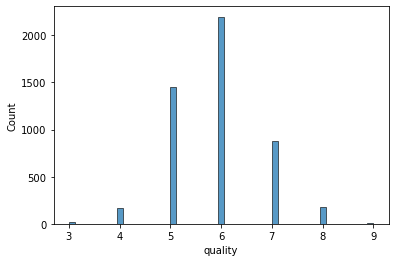

In [69]:
sns.histplot(data['quality'])

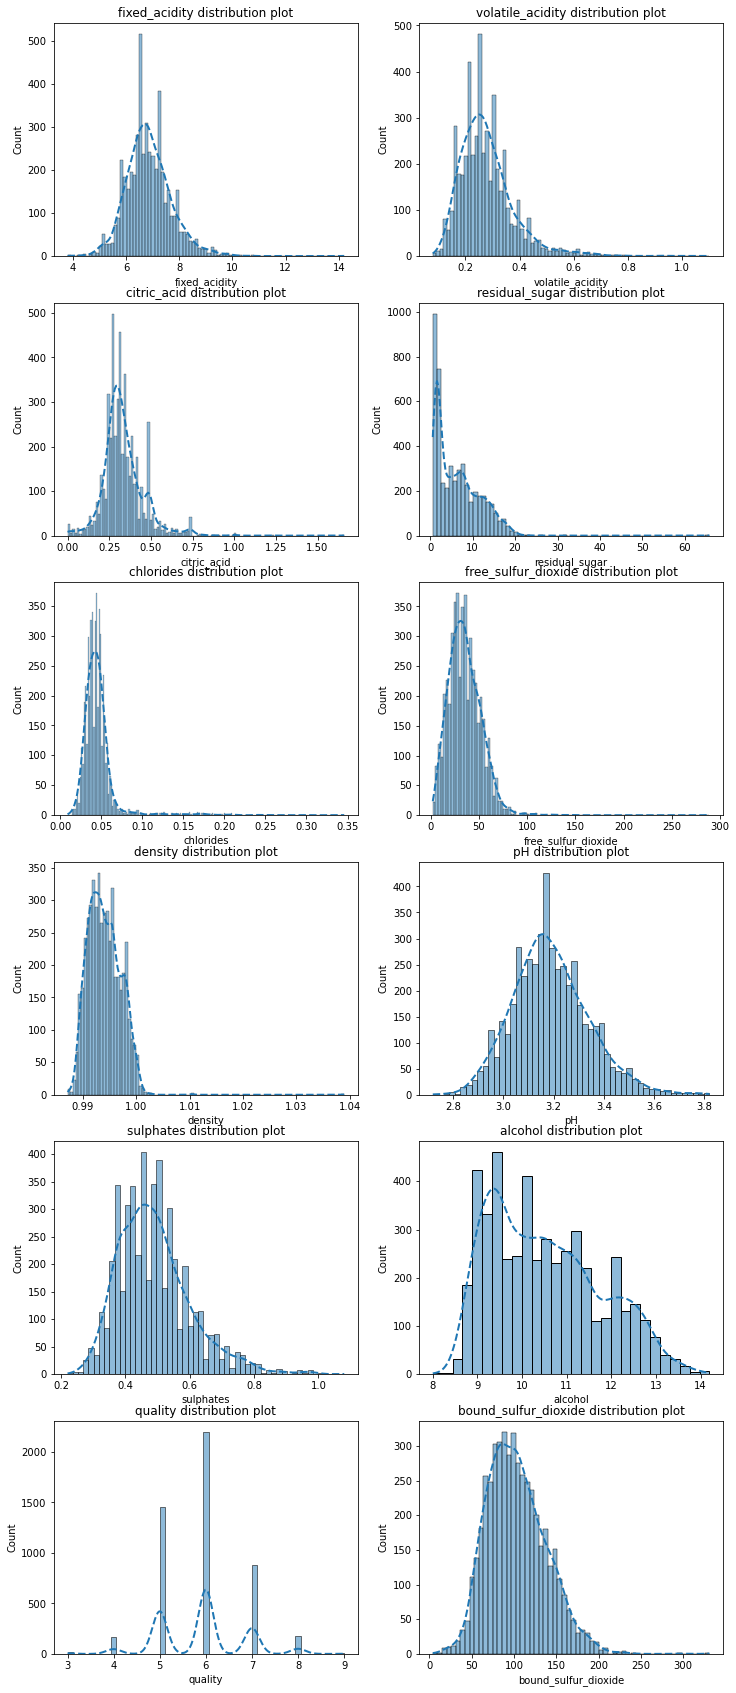

In [70]:
# 7. distribution plots
cols = data.columns

fig, axs = plt.subplots(ncols = 2, nrows = 6, figsize=(12,30))
axs = np.ravel(axs)

for i, col in enumerate(cols):
    plt.sca(axs[i])
    sns.histplot(data = data, x = col,
                 kde = True,
                 line_kws = {'lw':2, 'ls':'--'})
    plt.title(f'{col} distribution plot')


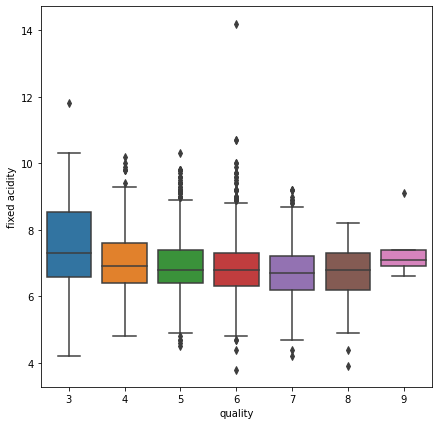

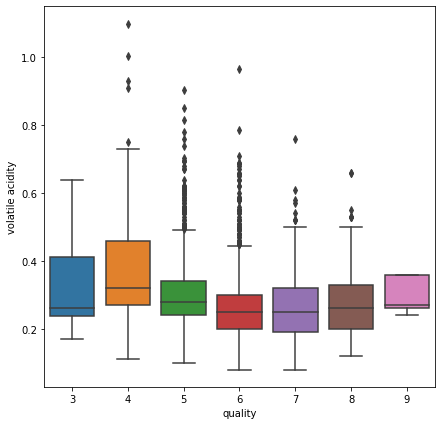

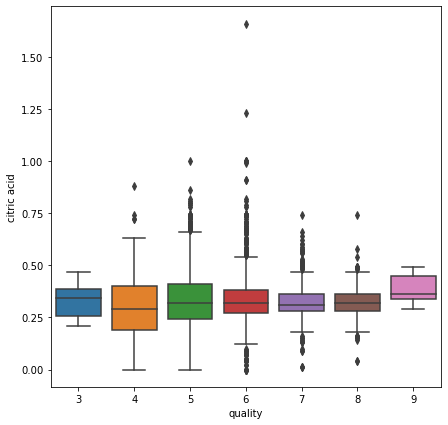

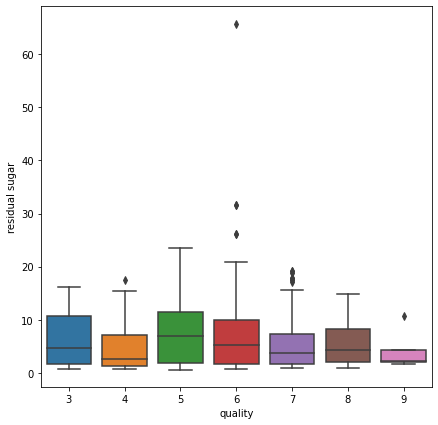

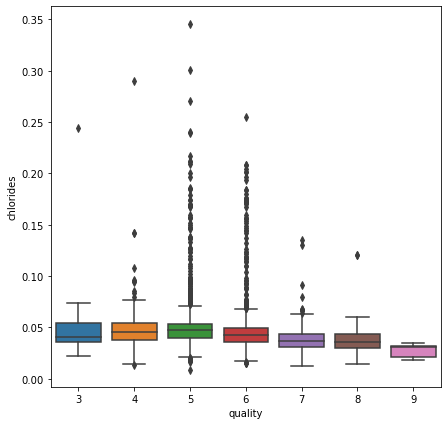

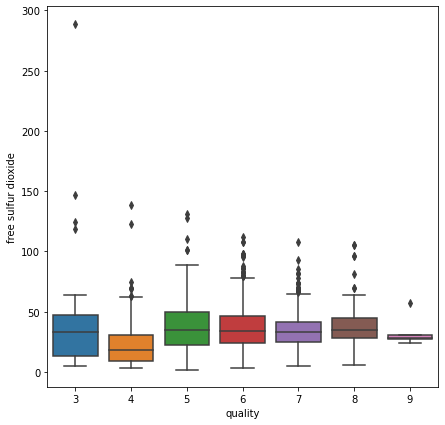

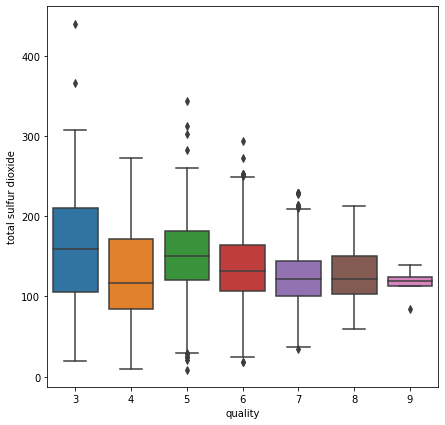

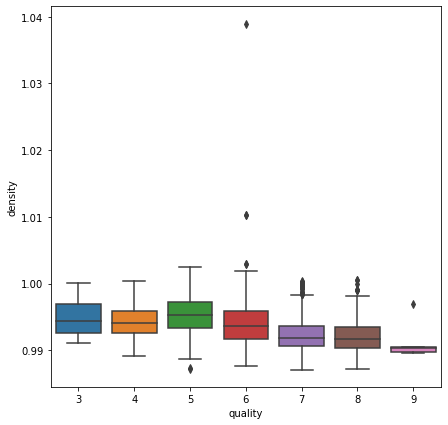

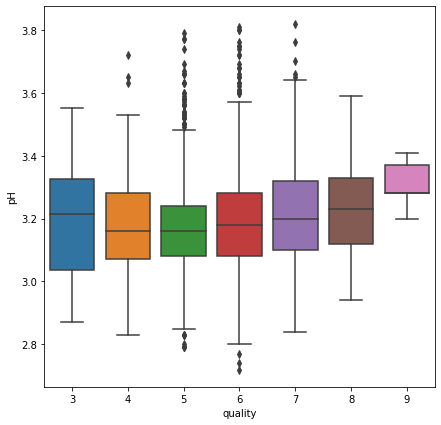

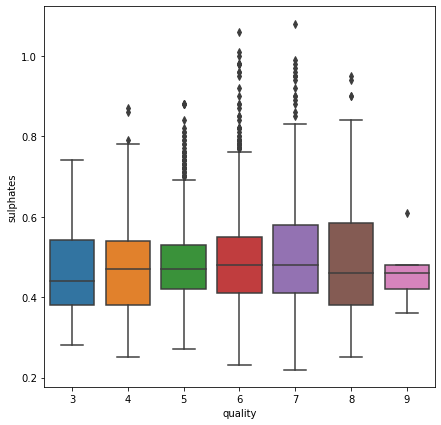

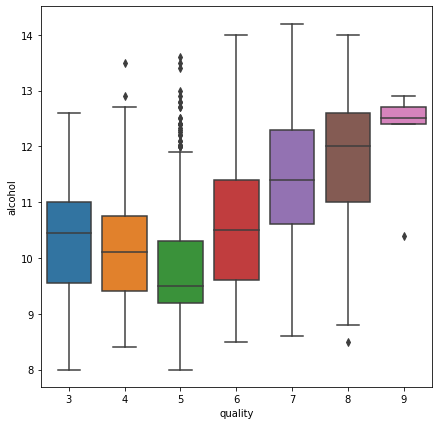

In [84]:
# 8. boxplot (outliers)

def plot_boxplot(data = data, x = 'quality', y=None):
    fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
    sns.boxplot(data = data, x = x, y = y, ax = axs)
    plt.show()

for col in data.columns.tolist()[:-1]:
    plot_boxplot(data=data, y=col)

Text(0.5, 1.0, 'Data mentah')

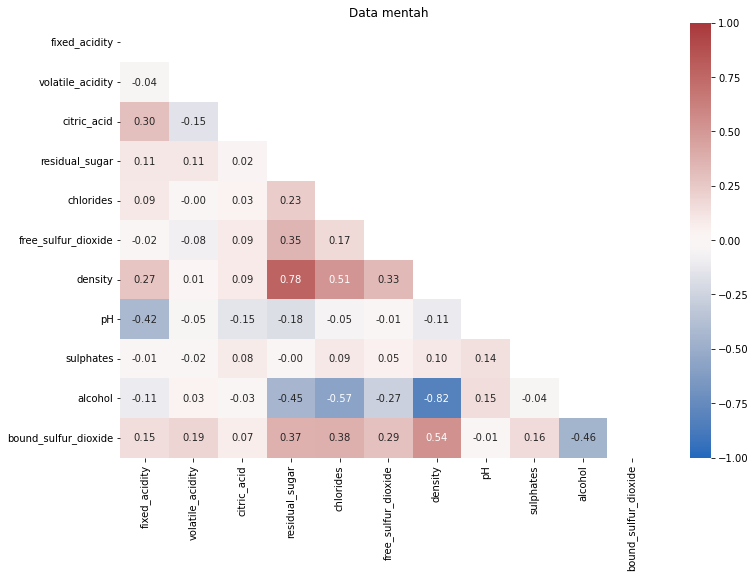

In [72]:
#9. korelasi antara fitur (column)
data_cor = data.drop('quality', axis=1)
corr_matrix = data_cor.corr(method = 'spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot = True,
            fmt= '.2f',
            cmap = 'vlag',
            center = 0, vmin = -1, vmax = 1,
            mask = np.triu(corr_matrix)
           )
plt.title('Data mentah')

In [74]:
# 10. Drop outliers & data cleaning

data_clean = data.copy()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

upper_l = Q3 + (1.5*IQR)
lower_l = Q1 - (1.5*IQR)

kolom = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'bound_sulfur_dioxide']

for i in kolom:
    data_clean[i] = data_clean[i][(data_clean[i]>=lower_l[i]) & (data_clean[i]<=upper_l[i])]
    
data_clean = data_clean.dropna()

In [80]:
print(data.shape)
print(data_clean.shape)

(4898, 12)
(3989, 12)


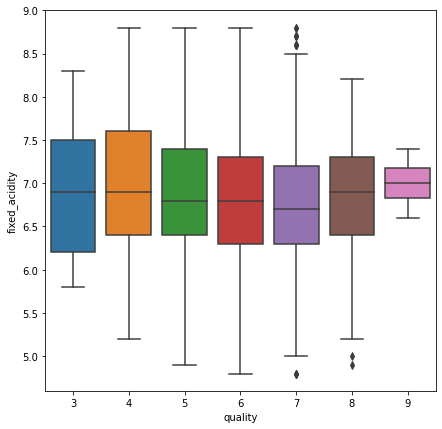

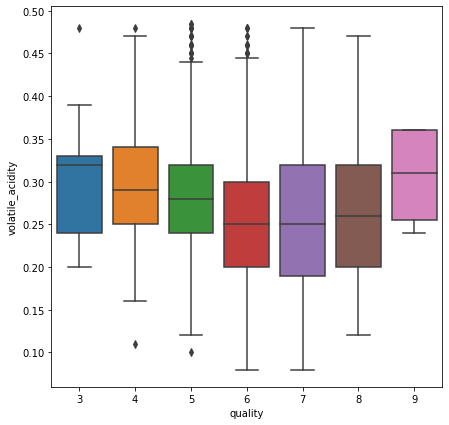

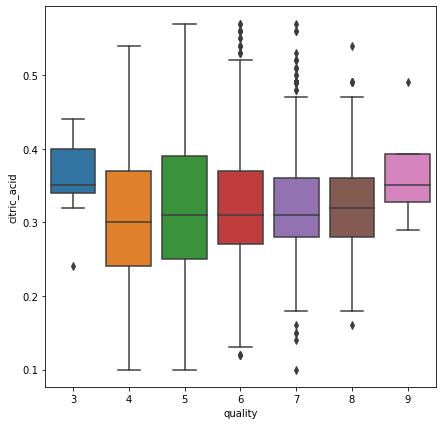

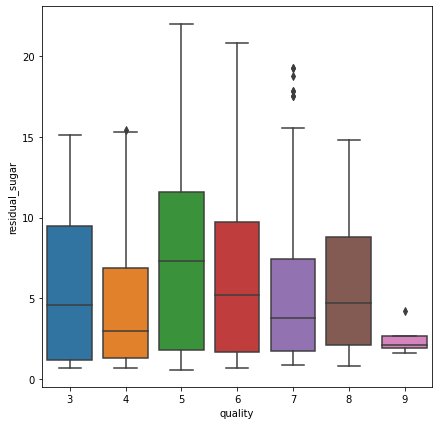

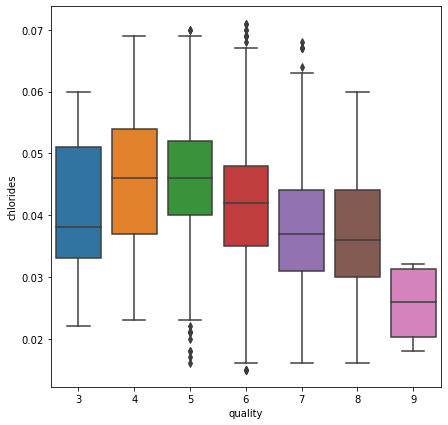

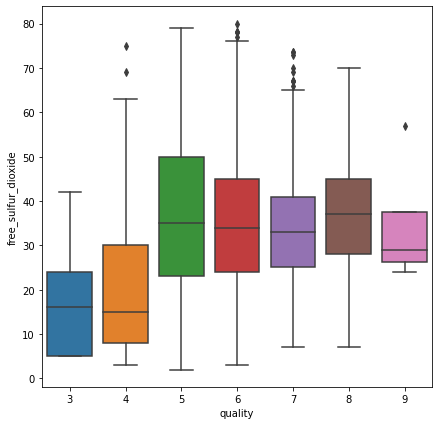

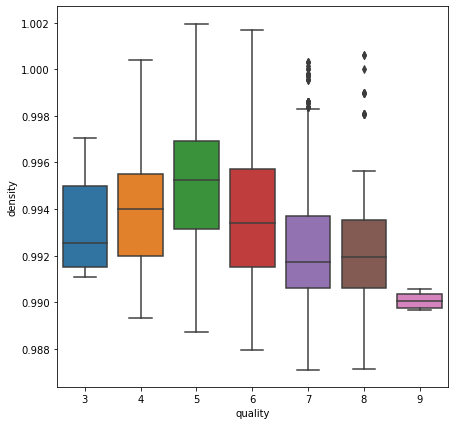

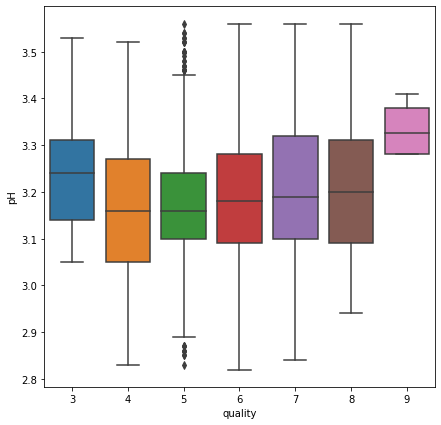

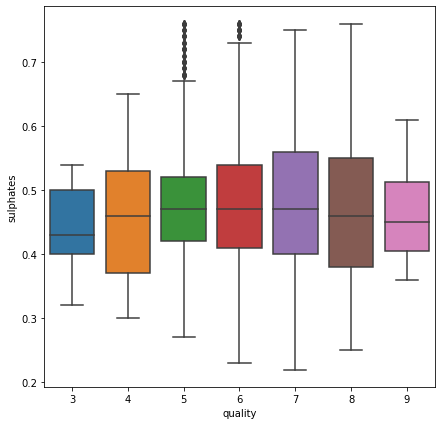

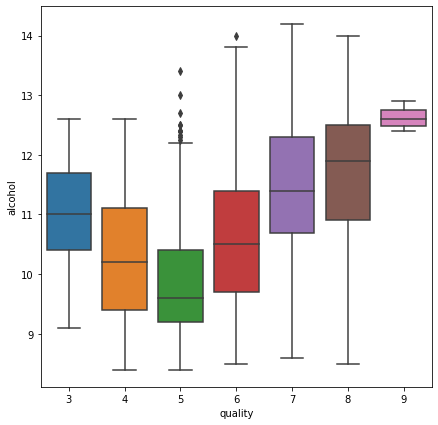

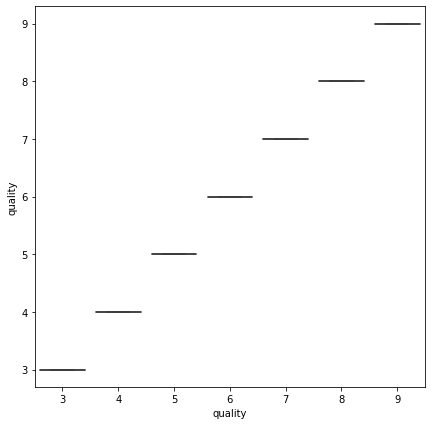

In [78]:
def plot_boxplot(data = data, x = 'quality', y=None):
    fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
    sns.boxplot(data = data, x = x, y = y, ax = axs)
    plt.show()

for col in data.columns.tolist()[:-1]:
    plot_boxplot(data=data_clean, y=col)

Text(0.5, 1.0, 'Data clean')

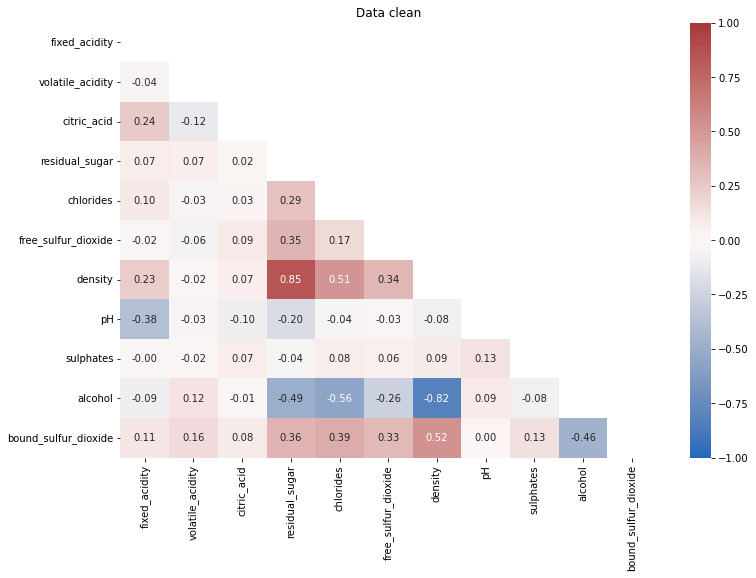

In [79]:
# 11. korelasi untuk data clean
data_cor_clean = data_clean.drop('quality', axis = 1)
corr_matrix_clean = data_cor_clean.corr(method='pearson')


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_clean,
            annot = True,
            fmt= '.2f',
            cmap = 'vlag',
            center = 0, vmin = -1, vmax = 1,
            mask = np.triu(corr_matrix)
           )
plt.title('Data clean')

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Text(0.5, 1.0, 'Density VS Alcohol')

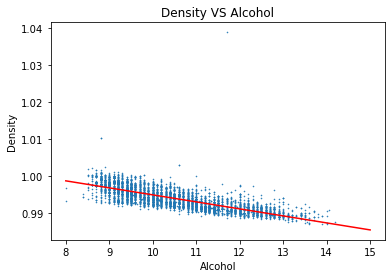

In [93]:
lin_reg.fit(data[["alcohol"]],data['density'])

y = lin_reg.predict([[8],[15]])
plt.plot([[8],[15]], y, color = 'red')

plt.scatter(data['alcohol'],data['density'], s= 0.3)

plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.title("Density VS Alcohol")


In [96]:
# plot the correlation

data_clean.sort_values(by='quality')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide
740,6.9,0.39,0.40,4.60,0.022,5.0,0.99150,3.31,0.37,12.6,3,14.0
1229,8.3,0.33,0.42,1.15,0.033,18.0,0.99110,3.20,0.32,12.4,3,78.0
3810,6.8,0.26,0.34,15.10,0.060,42.0,0.99705,3.24,0.52,10.5,3,120.0
3087,6.1,0.20,0.34,9.50,0.041,38.0,0.99500,3.14,0.44,10.1,3,163.0
1484,7.5,0.32,0.24,4.60,0.053,8.0,0.99580,3.14,0.50,9.1,3,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4338,7.3,0.19,0.27,13.90,0.057,45.0,0.99807,2.94,0.41,8.8,8,110.0
827,7.4,0.24,0.36,2.00,0.031,27.0,0.99055,3.28,0.48,12.5,9,112.0
876,6.9,0.36,0.34,4.20,0.018,57.0,0.98980,3.28,0.36,12.7,9,62.0
1605,7.1,0.26,0.49,2.20,0.032,31.0,0.99030,3.37,0.42,12.9,9,82.0


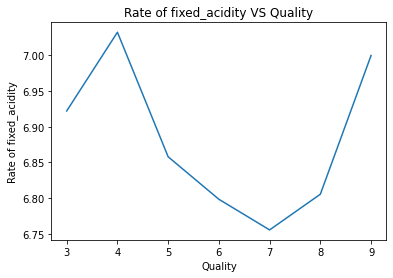

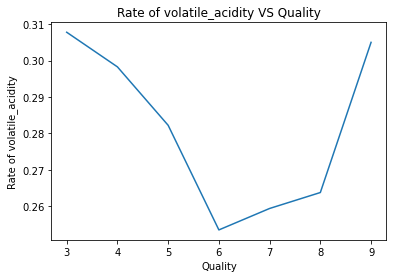

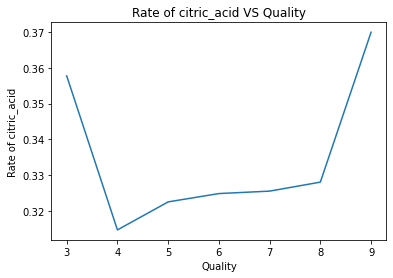

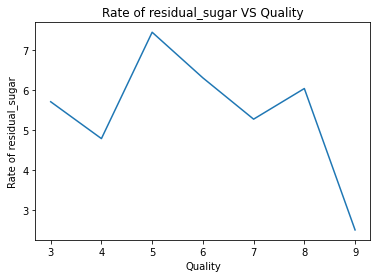

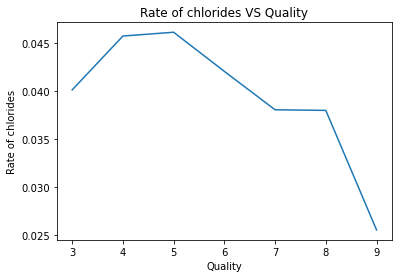

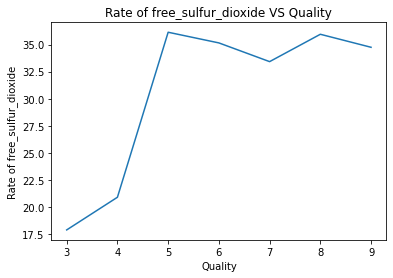

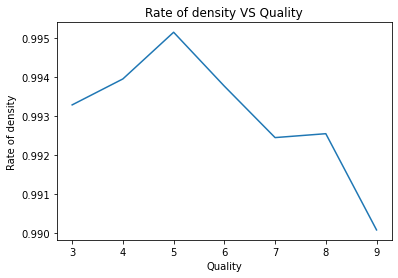

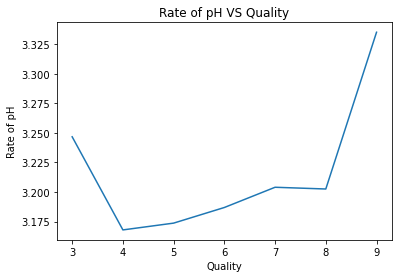

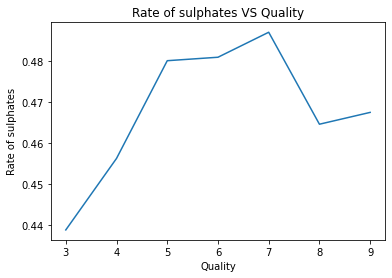

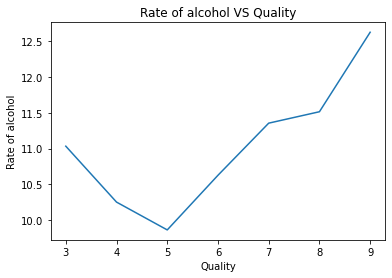

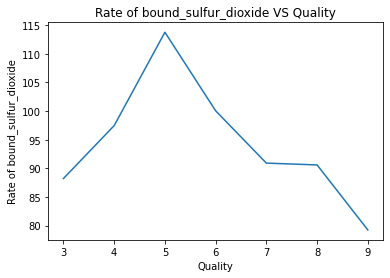

In [101]:
data_mean_feat_quality = data_clean.groupby(["quality"]).mean()

for i in data_mean_feat_quality.columns:
    plt.plot(data_mean_feat_quality.index, data_mean_feat_quality[i])
    plt.xlabel("Quality")
    plt.ylabel(f"Rate of {i}")
    plt.title(f"Rate of {i} VS Quality")
    plt.show()

In [102]:
# separate quality to quality class
data_clean['quality_class'] = 100

for i,x in enumerate(data_clean['quality']):
    if x > 6:
        data_clean['quality_class'].iloc[i]= 2
    elif x == 6:
        data_clean['quality_class'].iloc[i]= 1
    else:
        data_clean['quality_class'].iloc[i]= 0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [104]:
data_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,bound_sulfur_dioxide,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,125.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,118.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,67.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,139.0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,139.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,68.0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,111.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,81.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,90.0,2


In [108]:
data_clean.quality.value_counts()

6    1849
5    1097
7     796
8     145
4      89
3       9
9       4
Name: quality, dtype: int64

In [109]:
data_clean.quality_class.value_counts()

1    1849
0    1195
2     945
Name: quality_class, dtype: int64

<AxesSubplot:xlabel='quality_class', ylabel='Count'>

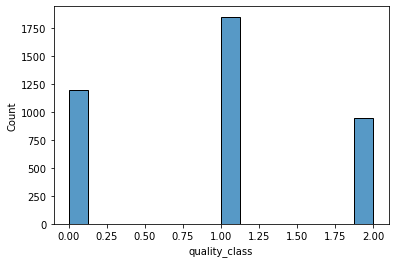

In [111]:
sns.histplot(data_clean.quality_class)

Text(0.5, 1.0, 'class_0')

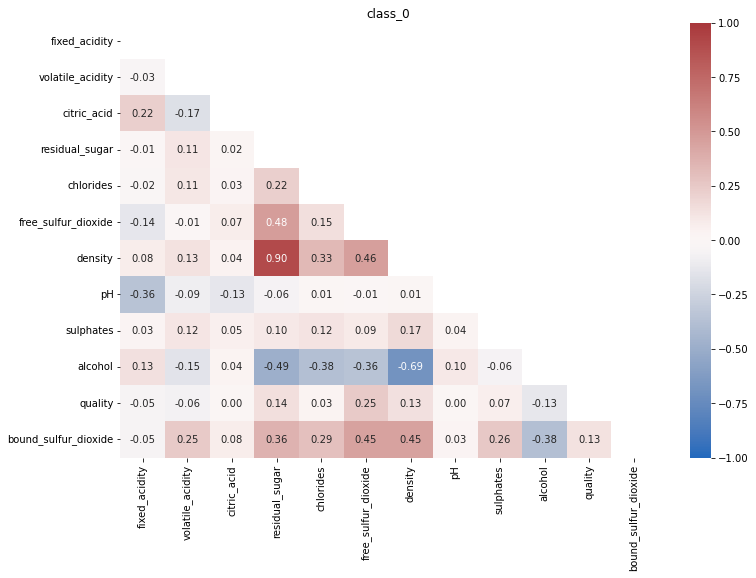

In [126]:
data_0 = data_clean[data_clean['quality_class']==0]

data_cor0 = data_0.drop('quality_class',axis = 1)
corr_matrix0 = data_cor0.corr(method='spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix0,
            annot = True,
            fmt= '.2f',
            cmap = 'vlag',
            center = 0, vmin = -1, vmax = 1,
            mask = np.triu(corr_matrix0)
           )
plt.title('class_0')

Text(0.5, 1.0, 'class_0')

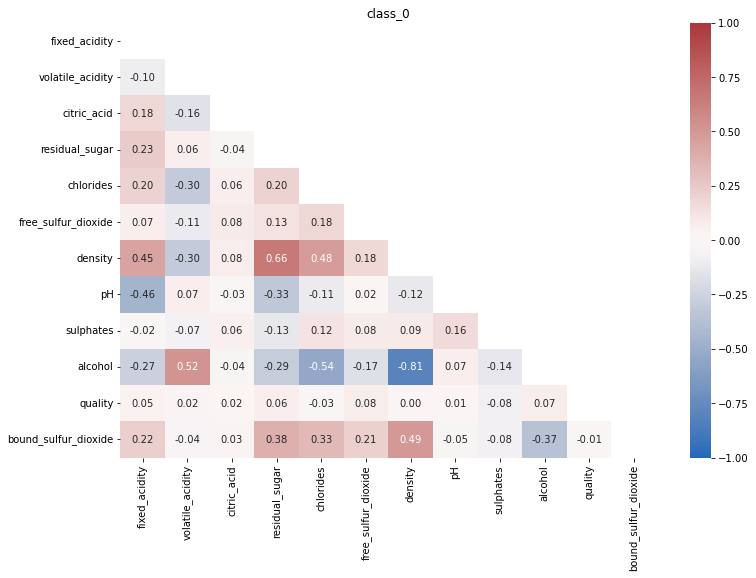

In [127]:
data_2 = data_clean[data_clean['quality_class']==2]

data_cor2 = data_2.drop('quality_class',axis = 1)
corr_matrix2 = data_cor2.corr(method='spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix2,
            annot = True,
            fmt= '.2f',
            cmap = 'vlag',
            center = 0, vmin = -1, vmax = 1,
            mask = np.triu(corr_matrix2)
           )
plt.title('class_0')

In [117]:
print(data_0.shape)
print(data_2.shape)

(1195, 13)
(945, 13)
